In [1]:
import os
import sys
 
os.environ["SPARK_HOME"] = "/usr/hdp/current/spark2-client"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"

#In below two lines, use /usr/bin/python2.7 if you want to use Python 2

os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.4-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")


from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("TwitterApp")
sc = SparkContext(conf=conf)

In [2]:
# May cause deprecation warnings, safe to ignore, they aren't errors
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import Row,SQLContext
from pyspark.sql.functions import desc

In [3]:
ssc = StreamingContext(sc, 10)
#ssc.checkpoint("checkpoint_TwitterApp")
sqlContext = SQLContext(sc)

In [4]:
socket_stream = ssc.socketTextStream("localhost", 5555)

In [5]:
lines = socket_stream.window( 20 )

In [6]:
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple('tweets', fields )


In [7]:
# Use Parenthesis for multiple lines or use \.
( lines.flatMap( lambda text: text.split( " " ) ) #Splits to a list
  .filter( lambda word: word.lower().startswith("#") ) # Checks for hashtag calls
  .map( lambda word: ( word.lower(), 1 ) ) # Lower cases the word
  .reduceByKey( lambda a, b: a + b ) # Reduces
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Stores in a Tweet Object
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) # Sorts Them in a DF
  .limit(10).registerTempTable("tweets") ) ) # Registers to a table.

__________
### Run the TweetRead.py file at this point
__________

In [8]:
ssc.start()

In [9]:

import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
# Only works for Jupyter Notebooks!
%matplotlib inline

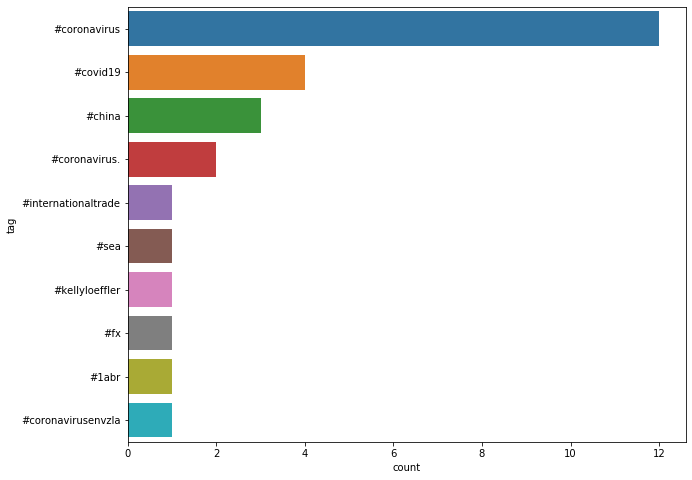

6


In [ ]:
count = 0
while count < 10:
    
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas()
    #top_10_df.sort(desc("count"))
    #print(top_10_df)
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1
    print (count)


In [11]:
top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )

In [12]:
top_10_tweets.show()

+----------------+-----+
|             tag|count|
+----------------+-----+
|    #coronavirus|    8|
|       #noticias|    1|
|#capitalismkills|    1|
|              #2|    1|
|   #covidontario|    1|
|            #gac|    1|
|        #covid19|    1|
|   #construccion|    1|
|          #covid|    1|
|      #recession|    1|
+----------------+-----+



In [ ]:
ssc.stop()